# Numpy

**The** python library for numerical computing is numpy. The main data object is the n-dimensional array; numpy functions create and manipulate n-d arrays. 

In [50]:
import numpy as np


# create a 6x6 array filled with zeros
shape = (6, 6)
array = np.zeros(shape)
print array
print type(array)
print

# the most important attributes of a numpy array are its shape and its dtype
print array.shape
print array.dtype


[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
<type 'numpy.ndarray'>

(6, 6)
float64


In [51]:
# 2d numpy arrays are indexed as [row, column]
array[1, 3] = 1
print array
print

# you can use fancy index slicing on numpy arrays. See http://docs.scipy.org/doc/numpy-1.10.1/user/basics.indexing.html
array[1::2, :] = 2
array[::2, -1] = 3
print array

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  3.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  3.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  3.]
 [ 2.  2.  2.  2.  2.  2.]]


In [52]:
# to create a mask, use comparisons directly on the array
# this creates an array of boolean values
mask = array==3
print mask
print

# a mask array can be used to index arrays (including images)
array[mask] += 1
print array
print 

[[False False False False False  True]
 [False False False False False False]
 [False False False False False  True]
 [False False False False False False]
 [False False False False False  True]
 [False False False False False False]]

[[ 0.  0.  0.  0.  0.  4.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  4.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  4.]
 [ 2.  2.  2.  2.  2.  2.]]



Note that it is almost never necessary to access array elements individually -- use library functions, algebraic expressions, and masks to manipulate images whenever possible.

In [53]:
# numpy has a ton of functions that are useful for manipulating and querying arrays
print np.fliplr(array)
print
print np.mean(array)
print np.std(array)

[[ 4.  0.  0.  0.  0.  0.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 4.  0.  0.  0.  0.  0.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 4.  0.  0.  0.  0.  0.]
 [ 2.  2.  2.  2.  2.  2.]]

1.33333333333
1.24721912892


# Matplotlib

<type 'numpy.ndarray'> (512, 512, 3) float32



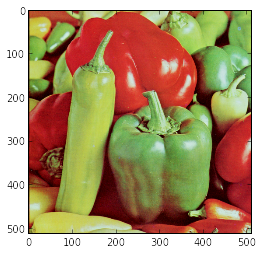

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

# imread loads many different image formats as numpy arrays
im = plt.imread('sample-images/peppers.png')
print type(im), im.shape, im.dtype
print 

plt.imshow(im);

The last dimension (of length 3) represents the channels in (red, green, blue) format. Grayscale images may only have 2 dimensions -- there is no channel dimension. Some image formats have an extra alpha channel, which specifies the transparency of each pixel.

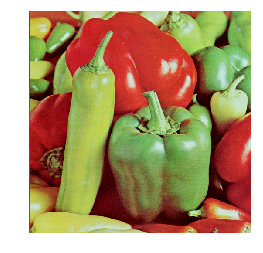

In [55]:
def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
    plt.figure()
    plt.imshow(im, interpolation='none', **kwargs)
    if title:
        plt.title(title)
    plt.axis('off')

my_imshow(im)

We can manipulate image pixels in the same way as any numpy array.

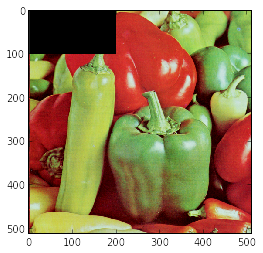

In [56]:
im[:100, :200, :] = 0
my_imshow(im)
plt.axis('on');

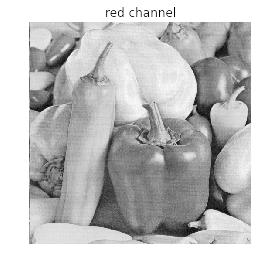

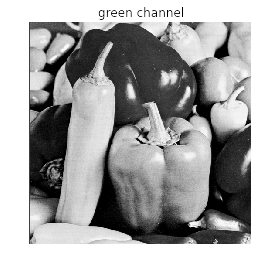

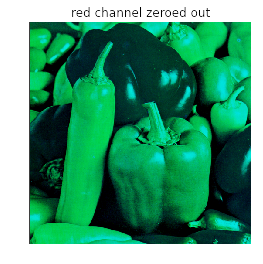

In [57]:
im = plt.imread('sample-images/peppers.png')
red = im[..., 0]
green = im[..., 1]

my_imshow(red, 'red channel')
plt.show()

my_imshow(green, 'green channel')

im[:,:,0] = 0
my_imshow(im, 'red channel zeroed out')


# Filtering: Blurring

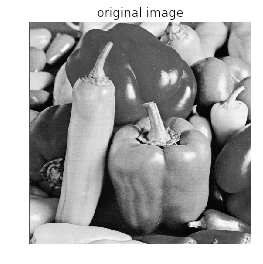

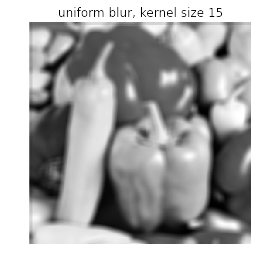

In [58]:
from skimage import filters
from scipy.ndimage.filters import convolve
from skimage import color

im = plt.imread('sample-images/peppers.png')
gray_im = color.rgb2gray(im)


# uniform blur
kern_sz = 15
kernel = np.ones((kern_sz,kern_sz))/kern_sz**2
uniform_blurred = convolve(gray_im, kernel)

my_imshow(gray_im, 'original image')
my_imshow(uniform_blurred, 'uniform blur, kernel size %i' % kern_sz)

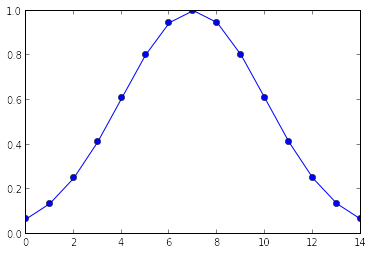

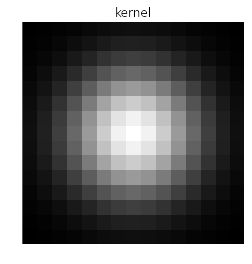

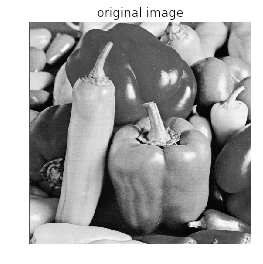

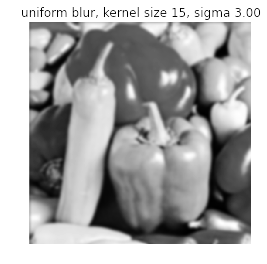

In [59]:
from scipy.signal import gaussian

# gaussian blur
kern_sz = 15
sigma = 3
kernel_1d = gaussian(kern_sz, sigma)
kernel = np.outer(kernel_1d, kernel_1d)
gauss_blurred = convolve(gray_im, kernel)

plt.plot(kernel_1d, 'o-')
my_imshow(kernel, 'kernel')
my_imshow(gray_im, 'original image')
my_imshow(gauss_blurred, 'uniform blur, kernel size %i, sigma %.2f' % (kern_sz, sigma))

**Note:** Both the uniform blur and the gaussian blur have efficient library implementations. In the above examples, I used explicit convolution calls to illustrate how these library functions work "under the hood". In production, you should use the library functions [`uniform filter`](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.ndimage.filters.uniform_filter.html) and [`gaussian_filter`](http://scikit-image.org/docs/dev/api/skimage.filters.html#gaussian-filter) to do blurring.

# Filtering: Gradients

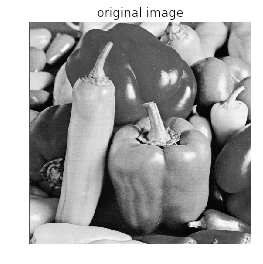

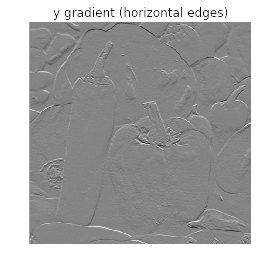

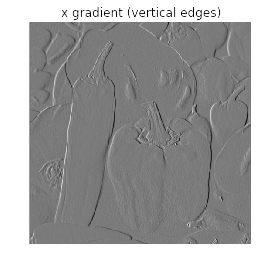

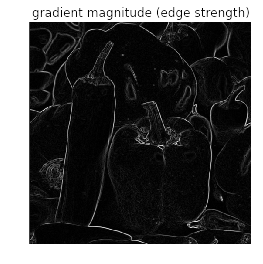

In [60]:
from skimage import filters

grad_x = filters.sobel_h(gray_im)
grad_y = filters.sobel_v(gray_im)
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

my_imshow(gray_im, 'original image')
my_imshow(grad_x, 'y gradient (horizontal edges)')
my_imshow(grad_y, 'x gradient (vertical edges)')
my_imshow(grad_mag, 'gradient magnitude (edge strength)')

# Filtering: Blob Detection

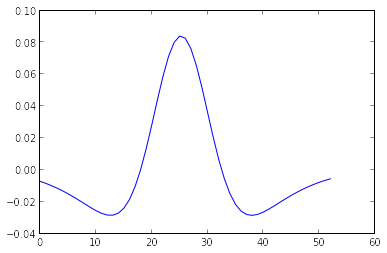

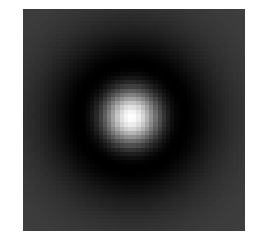

In [61]:
# difference of gaussians

sigma1 = 7.
sigma2 = 2.5*sigma1
kern_sz = 3*sigma2

x, y = np.mgrid[-kern_sz/2+1:kern_sz/2+1, -kern_sz/2+1:kern_sz/2+1]
rsqr = x**2 + y**2
gaussian1 = np.exp(-rsqr/sigma1**2)/sigma1
gaussian2 = np.exp(-rsqr/sigma2**2)/sigma2
dog_kern = gaussian1 - gaussian2

plt.figure()
plt.plot(dog_kern[:, kern_sz/2])

my_imshow(dog_kern)

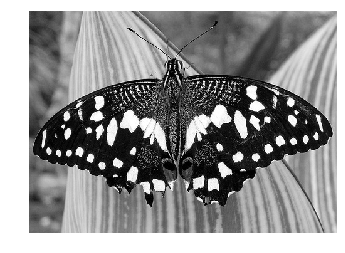

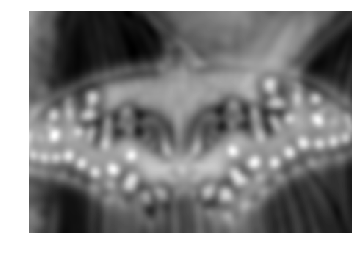

In [62]:
from scipy.signal import fftconvolve  # fftconvolve is usually much faster than plain convolve (they do the same thing)

im = plt.imread('sample-images/butterfly.png')
gray_im = color.rgb2gray(im)

blob_im = fftconvolve(gray_im, dog_kern, mode='valid')

my_imshow(gray_im)
my_imshow(blob_im)


# Thresholding

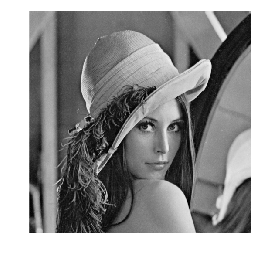

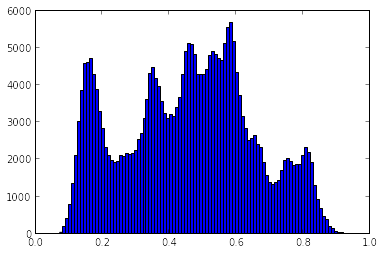

In [63]:
im = plt.imread('sample-images/lena.png')
gray_im = color.rgb2gray(im)

my_imshow(gray_im)

plt.figure()
plt.hist(gray_im.ravel(), bins=100);

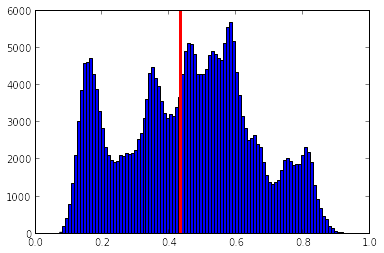

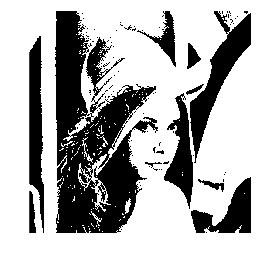

In [64]:
# use otsu's algorithm to select threshold
thresh = filters.threshold_otsu(gray_im)
thresholded = gray_im > thresh

plt.figure()
plt.hist(gray_im.ravel(), bins=100);
plt.plot([thresh, thresh], [0, 6000], linewidth=3, color='r');

my_imshow(thresholded)

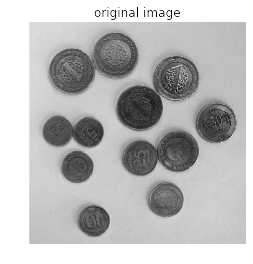

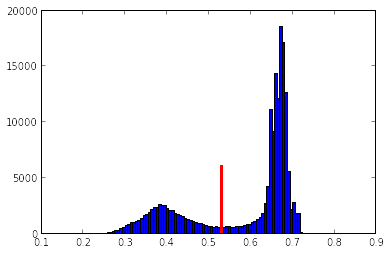

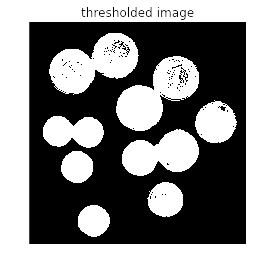

In [65]:
### dark on bright background
im = plt.imread('sample-images/coins.png')
gray_im = color.rgb2gray(im)
thresh = filters.threshold_otsu(gray_im)
coins = gray_im < thresh  # this is now a less-than operator

my_imshow(gray_im, 'original image')

plt.figure()
plt.hist(gray_im.ravel(), bins=100);
plt.plot([thresh, thresh], [0, 6000], linewidth=3, color='r');

my_imshow(coins, 'thresholded image')

# Morphology

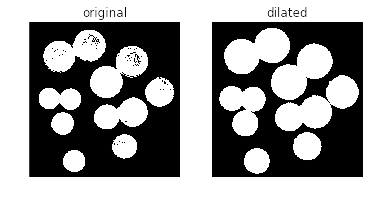

In [66]:
from skimage import morphology
from skimage.morphology import disk


dilated = morphology.binary_dilation(coins, disk(5))


# dilation
plt.figure()
plt.subplot(121)
plt.imshow(coins, cmap='gray', interpolation='none')
plt.title('original')
plt.axis('off');
plt.subplot(122)
plt.imshow(dilated, cmap='gray', interpolation='none')
plt.title('dilated')
plt.axis('off');

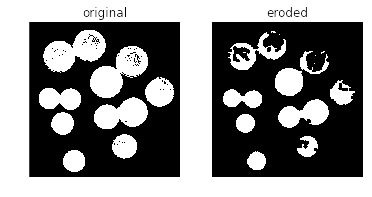

In [67]:
eroded = morphology.binary_erosion(coins, disk(5))

# erosion
plt.figure()
plt.subplot(121)
plt.imshow(coins, cmap='gray', interpolation='none')
plt.title('original')
plt.axis('off');
plt.subplot(122)
plt.imshow(eroded, cmap='gray', interpolation='none')
plt.title('eroded')
plt.axis('off');

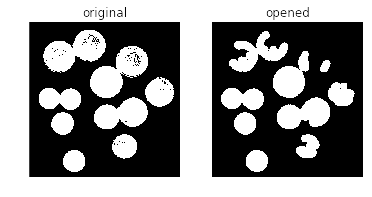

In [68]:
opened = morphology.binary_opening(coins, disk(10))

# opening
plt.figure()
plt.subplot(121)
plt.imshow(coins, cmap='gray', interpolation='none')
plt.title('original')
plt.axis('off');
plt.subplot(122)
plt.imshow(opened, cmap='gray', interpolation='none')
plt.title('opened')
plt.axis('off');

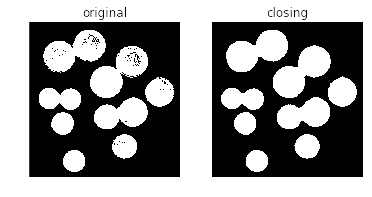

In [69]:
closed = morphology.binary_closing(coins, disk(5))

# closing
plt.figure()
plt.subplot(121)
plt.imshow(coins, cmap='gray', interpolation='none')
plt.title('original')
plt.axis('off');
plt.subplot(122)
plt.imshow(closed, cmap='gray', interpolation='none')
plt.title('closing')
plt.axis('off');


number of coins: 12


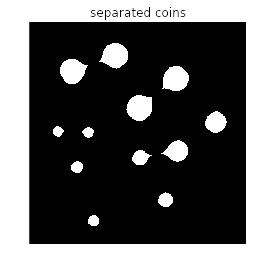

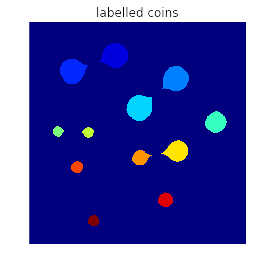

In [70]:
from skimage import measure

separated_coins = morphology.binary_erosion(closed, disk(20))
plt.figure()
plt.imshow(separated_coins, cmap='gray', interpolation='none')
plt.title('separated coins')
plt.axis('off')

labelled_coins = measure.label(separated_coins)
plt.figure()
plt.imshow(labelled_coins, cmap='jet', interpolation='none')
plt.title('labelled coins')
plt.axis('off')

num_coins = len(np.unique(labelled_coins))-1  # subtract 1 b/c background is labelled 0
print 'number of coins: %i' % num_coins

# Worked Example: Segmentation

As an example of a typical image processing problem, we will segment the following image of bacteria. 

original image shape: (1024, 1024, 4)
alpha channel intensity: 1.00 +- 0.00


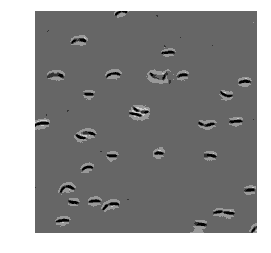

In [71]:
im = plt.imread('sample-images/caulobacter.png')
print 'original image shape:', im.shape
print 'alpha channel intensity: %.2f +- %.2f' % (np.mean(im[:,:,-1]), np.std(im[:,:,-1]))

my_imshow(im);

First, convert from color (4 channel, actually) to grayscale.

grayscale image shape: (1024, 1024)


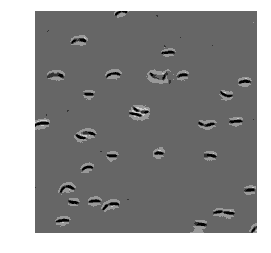

In [72]:
from skimage import color

# convert to gray 
gray_im = color.rgb2gray(im)
print 'grayscale image shape:', gray_im.shape

my_imshow(gray_im)


Blur slightly to reduce noise. (This isn't strictly necessary in this case, since it's a fairly high-quality image.)

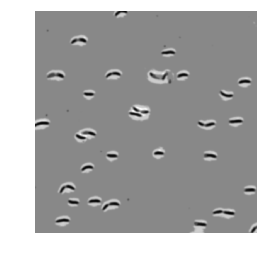

In [73]:
from skimage import filters

blurred_im = filters.gaussian_filter(gray_im, sigma=3)
my_imshow(blurred_im)

After the image is suitable pre-processed, we can threshold it to convert it to a cell mask.

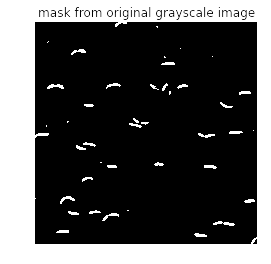

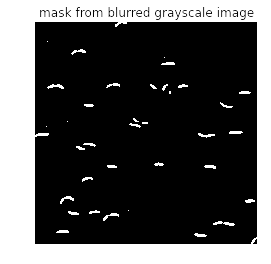

In [74]:
thresh = 0.3
mask = gray_im < thresh
blurred_mask = blurred_im < thresh

my_imshow(mask, title='mask from original grayscale image')
my_imshow(blurred_mask, title='mask from blurred grayscale image')

Binary images are manipulated with *morphological operations*. Morphological operations allow us to expand the white regions, shrink the white regions, fill in holes, and more. In this case, we simply want to remove the tiny dots.

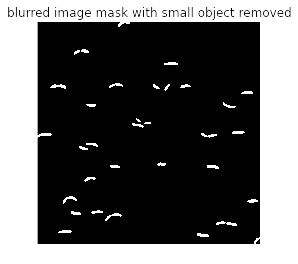

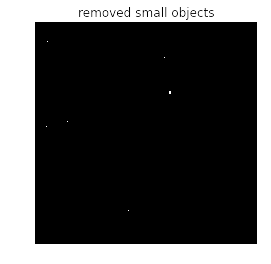

In [75]:
from skimage import morphology

blurred_mask_clean = morphology.remove_small_objects(blurred_mask, min_size=150)

my_imshow(blurred_mask_clean, title='blurred image mask with small object removed')
my_imshow(blurred_mask - blurred_mask_clean, 'removed small objects')

Some of the cells are touching, so they appear as one object, but we would like to identify them as separate objects. This is a very common problem in segmentation problems (noteably cell tracking). A common approach is to perform a *distance* transform, followed by a *watershed segmentation*.

The distance transform converts a binary mask (black-and-white image) into a floating point image (grayscale image) of the same size. Each pixel in the distance transform represents the *distance of that pixel from the nearest black point in the mask*. Thus, the brighest points in the distance transform are the points that are furthest from object boundaries. An example will help clarify. 

distance transform: (1024, 1024) float64


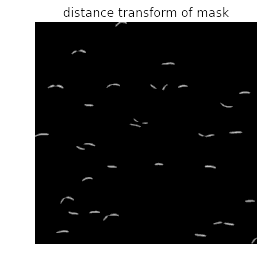

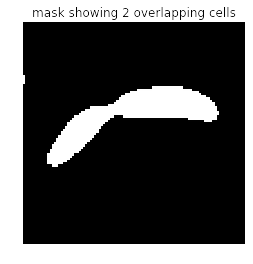

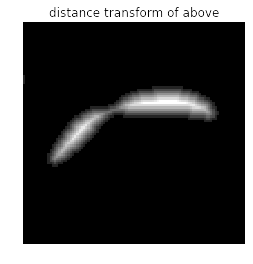

In [76]:
from scipy import ndimage as ndi

distance_im = ndi.distance_transform_edt(blurred_mask_clean)
print 'distance transform:', distance_im.shape, distance_im.dtype

my_imshow(distance_im, title='distance transform of mask')
my_imshow(blurred_mask_clean[850:950, 300:400], title='mask showing 2 overlapping cells')
my_imshow(distance_im[850:950, 300:400], title='distance transform of above')

If we've done everything right, the peaks of the distance transform image represent the centers of each cell (including those that overlap). We label each separate peak with a unique integer with `skimage.measure.label`.

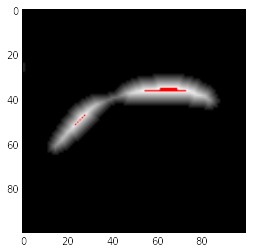

In [77]:
from skimage import feature, measure
from matplotlib.colors import ListedColormap

def imshow_overlay(im, mask, alpha=0.5, color='red', **kwargs):
    """Show semi-transparent red mask over an image"""
    mask = mask > 0
    mask = np.ma.masked_where(~mask, mask)        
    plt.imshow(im, **kwargs)
    plt.imshow(mask, alpha=alpha, cmap=ListedColormap([color]))


peaks_im = feature.peak_local_max(distance_im, indices=False)

plt.figure()
imshow_overlay(distance_im[850:950, 300:400], peaks_im[850:950, 300:400], alpha=1, cmap='gray')

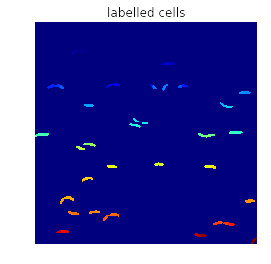

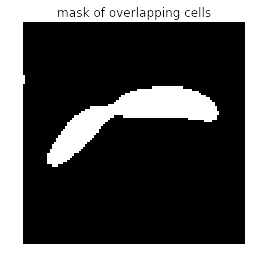

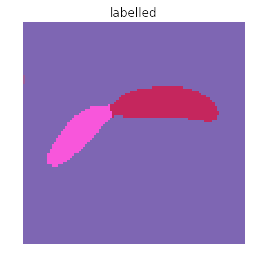

In [78]:
import matplotlib
random_colors = matplotlib.colors.ListedColormap (np.random.rand ( 256,3))


markers_im = measure.label(peaks_im)
labelled_cell_im = morphology.watershed(-distance_im, markers_im, mask=blurred_mask_clean)

my_imshow(labelled_cell_im, 'labelled cells', cmap='jet')
my_imshow(blurred_mask_clean[850:950, 300:400], 'mask of overlapping cells')
my_imshow(labelled_cell_im[850:950, 300:400], 'labelled', cmap=random_colors)
